<a href="https://colab.research.google.com/github/imatyushov/math-stat-hse-itmo/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;
import random;
import math;
from scipy.stats import uniform;

In [9]:
def create_selection_function(sample_selection):
  sorted_sample = np.sort(sample_selection) #sort
  sample_size = len(sample_selection) #объем выборки
  y = np.arange(1, sample_size + 1) / sample_size
  print(f'Sample size: { sample_size }')
  return sorted_sample, y

## 1) Построить оценки выборочных квантилей и оценить критерий достаточности объема выборки

построить оценки выборочных квантилей и изучить критерии достаточности размера выборки. Построить гистограмму и возвратить заданную квантиль.

### Quantile *ECDF*

In [10]:
def compute_quantile(sample_selection, grade):
  selection_size = len(sample_selection)
  sufficiency = True if selection_size >= 1 / grade else False
  # quantile = sample_selection[floor(selection_size * grade)]
  quantile = np.quantile(sample_selection, grade)
  return sufficiency, quantile

In [11]:
sample_size = 100;
sample_selection_new = np.random.uniform(0, 1, sample_size);

grade = 0.9
quantile = compute_quantile(sample_selection_new, grade)
print(quantile)

(True, 0.9132304084350251)


Sample size: 100


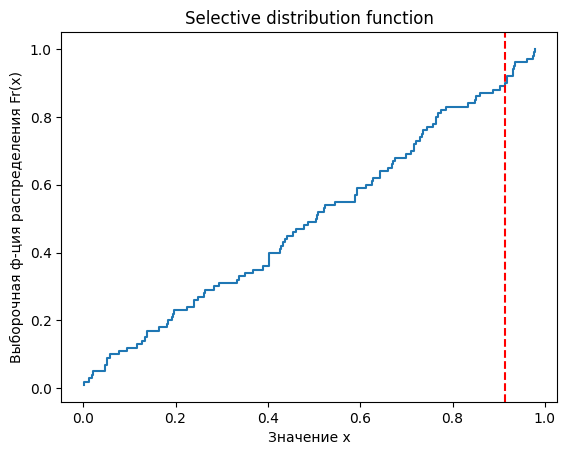

In [12]:
x, y = create_selection_function(sample_selection_new)

plt.step(x, y, where='post')
plt.xlabel('Значение x')
plt.ylabel('Выборочная ф-ция распределения Fr(x)')
plt.title('Selective distribution function')
plt.axvline(quantile[1], ls='--', color='red')
plt.grid = True
plt.show()

### Quantile *Histogram*

In [14]:
sample_size = 100;
sample_selection_new = np.random.uniform(0, 1, sample_size);
sample_selection_sorted = np.sort(sample_selection_new)

In [15]:
def convert_selection_to_histagram(sample_selection, grade):
  selection_size = len(sample_selection)
  column_size = 15
  column_nums = selection_size // column_size
  column_width = (sample_selection[-1] - sample_selection[0]) / column_nums

  quantile = np.quantile(sample_selection, grade)
  print(quantile)

  choose_column = quantile // column_width + 1
  print('Выбранная колонка', choose_column)
  choose_column_start = column_width * (choose_column - 1)
  print('Старт колонки', choose_column_start)
  choose_column_end = column_width * choose_column
  print('Конец колонки', choose_column_end)

  plt.hist(sample_selection_new, column_nums, density=True, rwidth=0.9)
  plt.axvline(quantile, ls='--', color='red')
  plt.show()

0.911521062328803
Выбранная колонка 6.0
Старт колонки 0.8293387599443923
Конец колонки 0.9952065119332707


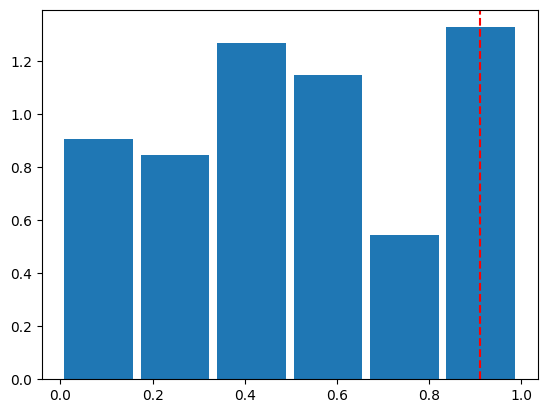

In [16]:
grade = 0.9
convert_selection_to_histagram(sample_selection_sorted, grade)

In [17]:
from math import floor
import bisect
from random import uniform
import matplotlib.pyplot as plt

size = 100
sample_selection_bisect = []
for i in range(size):
  bisect.insort_right(sample_selection_bisect, uniform(0, 1))

In [18]:
def convert_selection_to_histagram(sample_selection, grade):
  selection_size = len(sample_selection)
  column_size = 15
  column_nums = selection_size // column_size
  column_width = (sample_selection[-1] - sample_selection[0]) / column_nums

  quantile_index = floor(selection_size * grade)
  quantile = sample_selection[quantile_index]


  choose_column = quantile // column_width + 1
  choose_column_start = column_width * (choose_column - 1)
  choose_column_end = column_width * choose_column

  for el in sample_selection:
    if el > choose_column_start:
      start_index = sample_selection.index(el)
      break

  for el in sample_selection:
    if el > choose_column_end:
      end_index = sample_selection.index(el) - 1
      break

  num_elements_in_choose_column = end_index - start_index
  quantile_index_in_choose_column = sample_selection[start_index:end_index]

  my_quantile = (choose_column + quantile / num_elements_in_choose_column) * column_width

  plt.hist(sample_selection_new, column_nums, density=True, rwidth=0.9)
  plt.axvline(quantile, ls='--', color='red')
  plt.show()

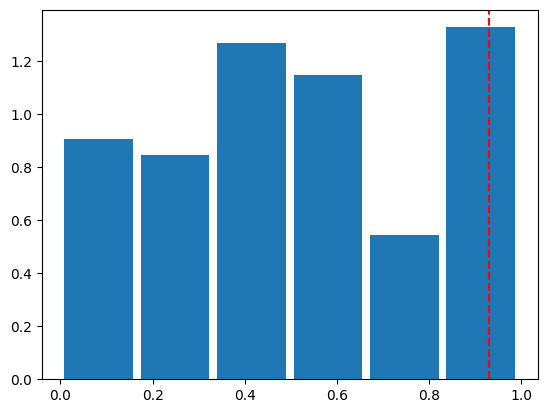

In [19]:
grade = 0.9
convert_selection_to_histagram(sample_selection_bisect, grade)